In [76]:
## Importing the libraries
import os
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.models import Sequential

# Set random seeds

os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(hash("setting random seeds") % 2 ** 32 - 1)
np.random.seed(hash("improves reproducibility") % 2 ** 32 - 1)
tf.random.set_seed(hash("by removing stochasticity") % 2 ** 32 - 1)



In [ ]:
# Installing W & B and login
!pip install wandb -qqq
import wandb
wandb.login()

In [39]:
## Data Preprocessing

# Preprocessing the training set

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

training_set = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 21612 images belonging to 249 classes.


In [40]:
#Preprocessing the test set

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 5511 images belonging to 252 classes.


In [41]:
## Building the CNN

# Initializing the CNN

cnn = tf.keras.models.Sequential()




In [42]:
# Convolution

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [43]:
# Pooling

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [44]:
# Adding more convolutional layers

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))





In [45]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])





In [46]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='relu')
])


In [47]:
cnn.add(tf.keras.layers.Flatten())

cnn.add(layers.Dropout(0.2))

In [48]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(layers.Dropout(0.2))

In [49]:
cnn.add(tf.keras.layers.Dense(units=300, activation='softmax'))

In [50]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 32)        

In [51]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor="val_loss",
#                                         mode="min",
#                                         patience=5,
#                                         restore_best_weights=True)

In [53]:
# Training the CNN model

history = cnn.fit(x=training_set, validation_data=test_set, epochs=60)

Epoch 1/60
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
676/676 [==============================] - ETA: 0s - loss: 5.5617 - accuracy: 0.0064WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A3BF7E8310> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, se

In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


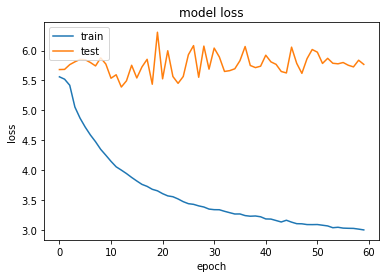

In [62]:
# Plotting the graph of the Training loss vs Validation over the number of epochs

# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# epochs = range(1,35)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

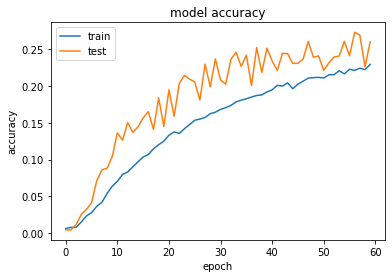

In [63]:
# Plotting the graph of training accuracy vs Validation accuracy over a number of epochs

# loss_train = history.history['accuracy']
# loss_val = history.history['val_accuracy']
# epochs = range(1,11)
# plt.plot(epochs, loss_train, 'g', label='Training accuracy')
# plt.plot(epochs, loss_val, 'b', label='validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()